#### Importando módulos

In [106]:
import pandas as pd
import numpy as np
import joblib as jb
import matplotlib.pyplot as plt
from dataprep.eda import create_report
from dataprep.eda import missing
from pycaret.datasets import get_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,max_error
from sklearn.metrics import mean_squared_error
import seaborn as sb

#### Aqui vamos definir nossa base e avaliar a distribuição dos dados com análise descritiva

In [107]:
df = get_data('automobile')
report = create_report(df)
report.show_browser()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


  0%|          | 0/3555 [00:00<?, ?it/s]

#### Criamos nosso normalizados(Deixará os dados numéricos em uma mesma escala) <br>
#### Criamos nosso numerador(Transformará os dados categóricos em numéricos)

In [108]:
normalizador = MinMaxScaler()
numerador = OneHotEncoder(sparse=False, drop='first')

#### Aqui vamos começar a tratar dados nulos e definir a base de Treino e Teste, nosso Target definido é o Preço(price). <br>
#### Aplicamos aqui também nosso 'normalizador' e nosso 'numerador' para tratar os dados


In [109]:

X = df.drop('price', axis=1).select_dtypes(exclude='object')
X['normalized-losses'] = X['normalized-losses'].fillna(X['normalized-losses'].mean())
X['Combustivel'] = df['fuel-type']
X['Combustivel_V'] = numerador.fit_transform(X.select_dtypes(include='object'))
X = X.drop('Combustivel', axis=1)
X = normalizador.fit_transform(X)
y = df['price']

#### Aqui vamos dividir as bases em Treino e Teste

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(151, 12)
(51, 12)
(151,)
(51,)


#### Aqui vamos criar nossa máquina preditora e ajustar os Hiperparâmetros

In [111]:
RFR = RandomForestRegressor(n_estimators= 1000,
                            max_depth= 15,
                            max_features= None,
                            max_samples= None
                            )

#### Após treinar vamos fazer as 3 predições: <br>
Base de Treino <br>
Base de Teste <br>
Base Completa <br>
##### Após as predições, vamos avaliar o desempenho de cada uma

In [112]:
fit = RFR.fit(x_train, y_train)

predict_train = RFR.predict(x_train)
predict_test = RFR.predict(x_test)
predict_full = RFR.predict(X)

rsme_train = mean_squared_error(y_train, predict_train) ** (0.5)
r2_train = r2_score(y_train, predict_train)
max_error_train = max_error(y_train, predict_train)
mean_absolute_error_train = mean_absolute_error(y_train, predict_train)

rsme_test = mean_squared_error(y_test, predict_test) ** (0.5)
r2_test = r2_score(y_test, predict_test)
max_error_test = max_error(y_test, predict_test)
mean_absolute_error_test = mean_absolute_error(y_test, predict_test)

rsme_full = mean_squared_error(y, predict_full) ** (0.5)
r2_full = r2_score(y, predict_full)
max_error_full = max_error(y, predict_full)
mean_absolute_error_full = mean_absolute_error(y, predict_full)

print('Treino')
print('RSME = ', rsme_train)
print('R2 = ', r2_train)
print('Max Error = ', max_error_train)
print('Mean Absolute = ', mean_absolute_error_train)

print('\nTeste')
print('RSME = ', rsme_test)
print('R2 = ', r2_test)
print('Max Error = ', max_error_test)
print('Mean Absolute = ', mean_absolute_error_test)

print('\nBase Completa')
print('RSME = ', rsme_full)
print('R2 = ', r2_full)
print('Max Error = ', max_error_full)
print('Mean Absolute = ', mean_absolute_error_full)

Treino
RSME =  871.6787564223156
R2 =  0.9855620489357465
Max Error =  3753.7940000000017
Mean Absolute =  600.2835187110352

Teste
RSME =  2600.3276418563923
R2 =  0.9247845023550114
Max Error =  7760.832000000002
Mean Absolute =  1745.170111924513

Base Completa
RSME =  1508.3600334932235
R2 =  0.9638678539650067
Max Error =  7760.832000000002
Mean Absolute =  889.3390447203786


#### Aqui vamos trazer a predição na última coluna da base completa, para comparação

In [113]:
df_copy = df.copy()
df_copy['Predict'] = predict_full
df_copy

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Predict
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,14615.837583
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,14615.837583
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,15590.574750
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,12622.257167
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,15955.132167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,19875.362000
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,20578.831000
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.4,23.0,106,4800,26,27,22470,21542.581000
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625,21999.214000


#### Trazendo de forma gráfica a predição na base completa<br>
#### (vemos que há aumento de erros quando os valores saem da média e vão ficando mais altos)

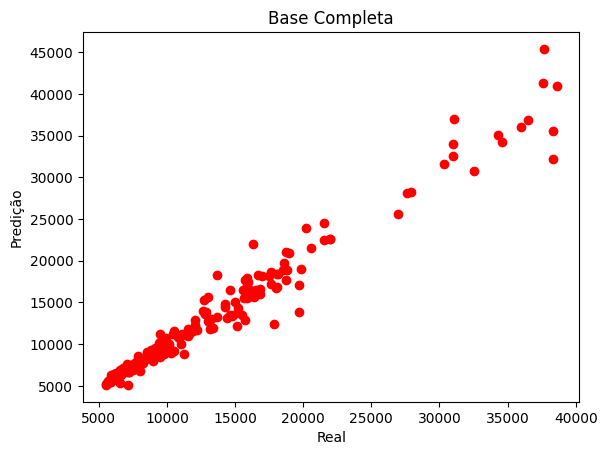

In [114]:
plt.title('Base Completa')
plt.ylabel('Predição')
plt.xlabel('Real')
plt.plot(predict_full,y,'ro')

#### Salvar ML criada

In [115]:
jb.dump(RFR, filename='RFR_Price')

['RFR_Price']

#### Carregar máquina criada

In [116]:
jb.load('RFR_Price')

RandomForestRegressor(max_depth=15, max_features=None, n_estimators=1000)